In [144]:
res1=np.load("/tmp/residues_1.npy",allow_pickle=True)
res2=np.load("/tmp/residues_1.npy",allow_pickle=True)

import sys
sys.path.append("..")


from utils.viz_utils import comparison_plot_3D_representation_projected_slices

In [1]:
import matplotlib.pyplot as plt

import numpy as np

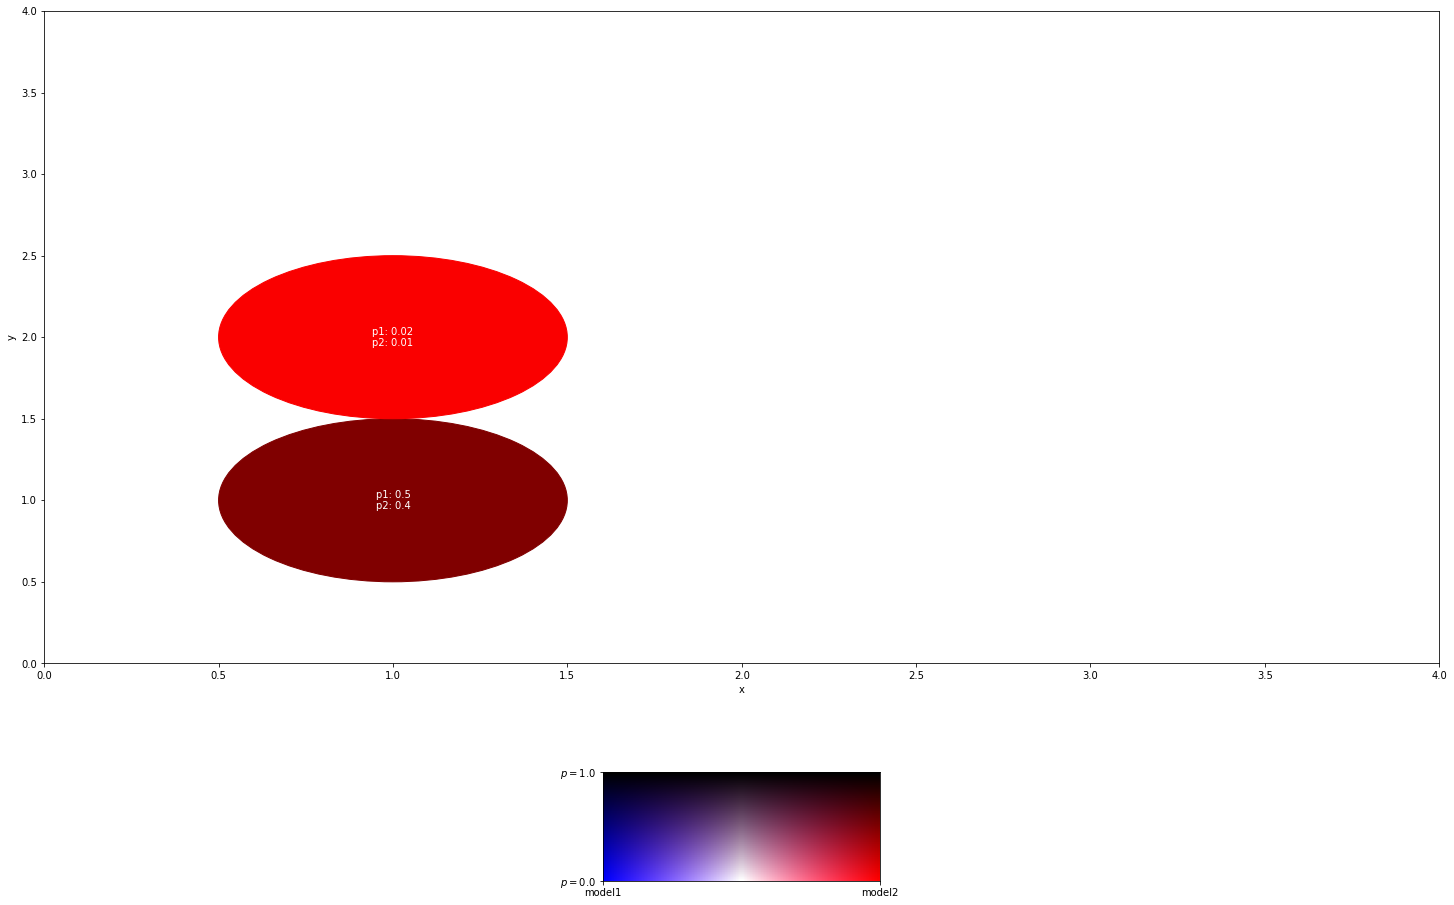

In [106]:
(np.concatenate((Cp2, p_values_range*Cp1[:,::-1], ), axis=1)[:,::-1],
 np.concatenate((C0,C0[:,::-1]), axis=1),
np.concatenate((p_values_range*Cp1, Cp2), axis=1)[:,::-1])

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.16493128e-04, 8.32986256e-04, ...,
         2.04081633e-02, 2.04081633e-02, 2.04081633e-02],
        [0.00000000e+00, 8.32986256e-04, 1.66597251e-03, ...,
         4.08163265e-02, 4.08163265e-02, 4.08163265e-02],
        ...,
        [0.00000000e+00, 1.95751770e-02, 3.91503540e-02, ...,
         9.59183673e-01, 9.59183673e-01, 9.59183673e-01],
        [0.00000000e+00, 1.99916701e-02, 3.99833403e-02, ...,
         9.79591837e-01, 9.79591837e-01, 9.79591837e-01],
        [0.00000000e+00, 2.04081633e-02, 4.08163265e-02, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]]),
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 8.49985975e-06, 2.54995793e-05, ...,
         2.54995793e-05, 8.49985975e-06, 0.00000000e+00],
        [0.00000000e+00, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


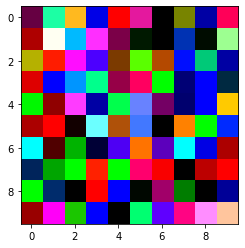

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02040816, 0.02040816, 0.02040816, ..., 0.02040816, 0.02040816,
        0.02040816],
       [0.04081633, 0.04081633, 0.04081633, ..., 0.04081633, 0.04081633,
        0.04081633],
       ...,
       [0.95918367, 0.95918367, 0.95918367, ..., 0.95918367, 0.95918367,
        0.95918367],
       [0.97959184, 0.97959184, 0.97959184, ..., 0.97959184, 0.97959184,
        0.97959184],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

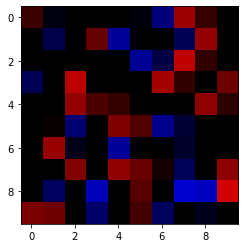

In [140]:

        
        

plt.imshow(img, cmap=cmap)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.16493128e-04, 8.32986256e-04, ...,
        2.04081633e-02, 2.04081633e-02, 2.04081633e-02],
       [0.00000000e+00, 8.32986256e-04, 1.66597251e-03, ...,
        4.08163265e-02, 4.08163265e-02, 4.08163265e-02],
       ...,
       [0.00000000e+00, 1.95751770e-02, 3.91503540e-02, ...,
        9.59183673e-01, 9.59183673e-01, 9.59183673e-01],
       [0.00000000e+00, 1.99916701e-02, 3.99833403e-02, ...,
        9.79591837e-01, 9.79591837e-01, 9.79591837e-01],
       [0.00000000e+00, 2.04081633e-02, 4.08163265e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [145]:
import sys

sys.path.append("..")

import tensorflow as tf

import numpy as np

from utils import tf_config

dataset="01"
memory_limit=1500
n_individuals=10
interval_eeg=10
seed=8#works: 2,3,5

tf_config.set_seed(seed=seed)
tf_config.setup_tensorflow(device="GPU", memory_limit=memory_limit)

import GPyOpt

import argparse

from utils import preprocess_data, search_algorithms, train, losses_utils, metrics, bnn_utils, eeg_utils, viz_utils

from models import fmri_ae, eeg_to_fmri, uniconv_fmri

from layers import locally_connected, fourier_features

import matplotlib.pyplot as plt

import gc

import os

from sklearn.model_selection import train_test_split, KFold

import time

with tf.device('/CPU:0'):
    train_data, _ = preprocess_data.dataset(dataset, n_individuals=n_individuals,
                                            interval_eeg=interval_eeg, 
                                            ind_volume_fit=False,
                                            standardize_fmri=True,
                                            iqr=False,
                                            verbose=True)
    eeg_train,fmri_train=train_data

2021-12-29 12:16:18.885459: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-29 12:16:18.903977: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-29 12:16:18.948328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-29 12:16:18.948914: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX150 computeCapability: 6.1
coreClock: 1.5315GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 44.76GiB/s
2021-12-29 12:16:18.948963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-12-29 12:16:18.964014: I tensorflow/stream_executor/platform/default/dso_l

I: Starting to Load Data
I: Finished Loading Data
I: Pairs Created


In [152]:
eeg_train = eeg_train[:100]
fmri_train = fmri_train[:100]

In [150]:
res1=np.load("/tmp/residues_1.npy", allow_pickle=True)
res2=np.load("/tmp/residues_1.npy", allow_pickle=True)


from scipy.stats import ttest_ind


pvalues=ttest_ind(res1, res2, axis=0).pvalue

In [154]:
res1.shape

res2.shape

pvalues.shape

.shape

(64, 64, 30, 1)

(64, 64, 3)


ValueError: RGBA sequence should have length 3 or 4

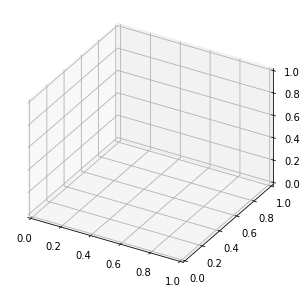

In [162]:
import importlib
importlib.reload(viz_utils)

viz_utils.comparison_plot_3D_representation_projected_slices(np.mean(res1,axis=0), np.mean(res2, axis=0), pvalues, 
                                                             np.mean(fmri_train, axis=0))

In [163]:
#colormap definition
cp1 = np.linspace(0,1)
cp2 = np.linspace(0,1)
Cp1, Cp2 = np.meshgrid(cp1,cp2)
C0 = np.full_like(Cp1, Cp1*Cp2*((Cp1)+(Cp2))/2)
p_values_range=Cp2#place holder that can stay to emulate pvalues
Legend = np.dstack((np.concatenate((Cp2, p_values_range*Cp1[:,::-1], ), axis=1)[:,::-1],
                    np.concatenate((C0,C0[:,::-1]), axis=1),
                    np.concatenate((p_values_range*Cp1, Cp2), axis=1)[:,::-1]))
cmap=ListedColormap(Legend)

In [170]:
np.random.randn(10,10,3).shape

(10, 10, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


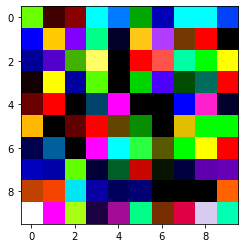

In [174]:
plt.imshow(np.random.randn(10,10,3),cmap=cmap)

In [177]:
cmap(np.random.randn(10,10,3)[0,0,:])

ValueError: RGBA sequence should have length 3 or 4